# Demonstration of the Euler Maclaurin Formula

Let's look at how Euler famously used the formula to estimate
$$
\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}
$$


First, define the partial sum
$$
S_N = \sum_{n=1}^N \frac{1}{x^2}
$$
Then notice
$$
f^{(n-1)} = n! (-1)^{n-1} x^{-(n+1)}
$$
Thus
$$
\sum_{n=2}^k \frac{B_n}{n!} \left[ \frac{d^{n-1} f(x)}{dx^{n-1}} \Big|_b  - \frac{d^{n-1} f(x)}{dx^{n-1}} \Big|_a \right] = \sum_{n=2}^k B_n (1 - \frac{1}{N^{n+1}})
$$
also



\begin{align}
\int_1^N \frac{1}{x} & = 1 - \frac{1}{N}
\\
\frac{f(N) + f(1)}{2} & = \frac{1}{2} + \frac{1}{2N^2}
\end{align}


Plugging this into the truncated E-M formula we find


\begin{split}
S_N & = (1 - \frac{1}{N})  + (\frac{1}{2} + \frac{1}{2N^2}) + (\sum_{n=2}^\infty B_n (1 - \frac{1}{N^{n+1}}))
\\
& = \sum_{n=0}^\infty B_n + (-\frac{1}{N} + \frac{1}{2N^2} - \sum_{n=2}^\infty B_n \frac{1}{N^{n+1}})
\end{split}


Letting $N\to \infty$ we actually see
$$
\sum_{N=1}^\infty \frac{1}{n^2} = \sum_{n=0}^\infty B_n
$$
So, we see that 
$$
\begin{split}
S_N & = \sum_{n=0}^\infty B_n + (-\frac{1}{N} + \frac{1}{2N^2} - \sum_{n=2}^\infty B_n \frac{1}{N^{n+1}})
\\
& = \sum_{n=1}^\infty \frac{1}{n^2} + (-\frac{1}{N} + \frac{1}{2N^2} - \sum_{n=2}^\infty B_n \frac{1}{N^{n+1}})
\end{split}
$$
So,

$$
\begin{split}
\sum_{n = 1}^\infty \frac{1}{n^2} & = S_n + \frac{1}{N} - \frac{1}{2N^2} + \sum_{n=2}^\infty B_n \frac{1}{N^{n+1}})
\\
& \approx  S_n + \frac{1}{N} - \frac{1}{2N^2} + \sum_{n=2}^k B_n \frac{1}{N^{n+1}})
\end{split}
$$


If we truncate the sum on the RHS, we get a fairly good approximation of the infinite sum. 


We can easily implement this in python. Let's also implement the naive summation to see what kind of an edge EM gives us.

In [7]:
from scipy.special import bernoulli # To get the Bernoulli numbers (B_n)
import matplotlib.pyplot as plt
import numpy as np

def naive(N):
    return sum([1/(n**2) for n in range(1,N+1)])

def EMapprox(N,k):
    bernoulli_nums = bernoulli(k) # Define bernoulli numbers

    partialSum = sum([1/(n**2) for n in range(1,N+1)])
    correction = 1/N - 1/(2*N**2) + sum([bernoulli_nums[n]/(N**(n+1)) for n in range(2,k+1)])
    
    return partialSum + correction




Let's see how accurate our approximation works as a function of N. I'll only use 4 terms on the RHS (so we need k = 4+2). Let's also remember that—thanks to Euler— we know that the true answer is $\pi^2/6$. In order to investigate, I'll choose to look at the relative error.

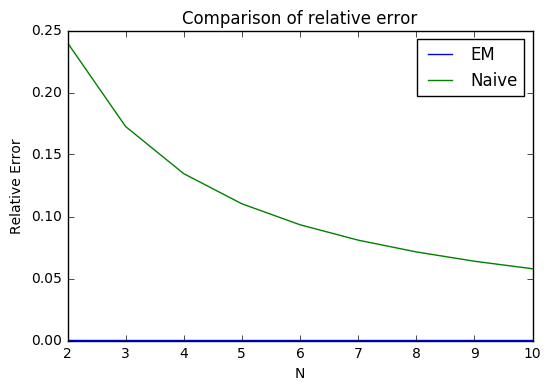

In [23]:
answer = np.pi**2 / 6
N = 10
k = 6
ran = range(2,N+1) # Let's at least start with 2 terms
error_Em = [abs(EMapprox(n,k) - answer)/answer for n in range(2,N+1)]
error_naive = [abs(naive(n) - answer)/answer for n in range(2,N+1)]

fig = plt.figure()
plt.plot(ran,error_Em)
plt.plot(ran,error_naive)
plt.legend(['EM', 'Naive'])
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.title('Comparison of relative error')
fig.savefig('relErr_compare',dpi =fig.dpi)
plt.show()


Ok, so it's not even close. Let's only plot the EM relative error now. Just to get a feel for it and be able to actually see the behaviour.

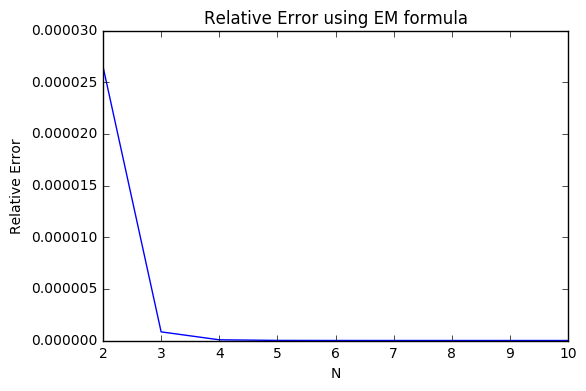

In [10]:
fig = plt.figure()
plt.plot(ran,error_Em)
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.title('Relative Error using EM formula')
fig.savefig('relErr_EM.png', dpi=fig.dpi)
plt.show()



Well as we can see, this formula helps us to converge extremely quickly. What would take naive summation many many many terms takes the EM shortcut only a handful. 